<a href="https://colab.research.google.com/github/Isenlith/ProcImag/blob/master/Ruidos_cores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

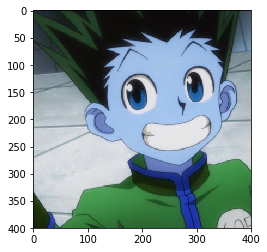

In [0]:
imagem = cv2.imread('gon.jpg', cv2.IMREAD_COLOR)
altura, largura, canal = imagem.shape
plt.imshow(imagem)

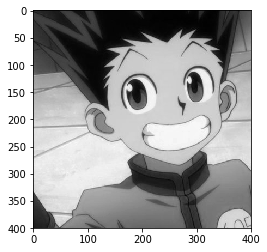

In [0]:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

r = imagem_rgb[:, :, 0]
g = imagem_rgb[:, :, 1]
b = imagem_rgb[:, :, 2]

plt.imshow(g, cmap='gray')

In [0]:
imagem_lab = cv2.cvtColor(imagem_rgb, cv2.COLOR_RGB2Lab)

L = imagem_lab[:, :, 0]
a = imagem_lab[:, :, 1]
b = imagem_lab[:, :, 2]

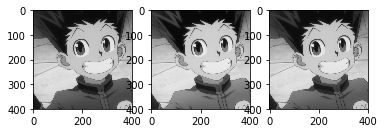

In [0]:
gray = imagem_rgb.mean(axis=2)
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(L, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(imagem_rgb, cv2.COLOR_RGB2GRAY), cmap='gray', vmin=0, vmax=255)

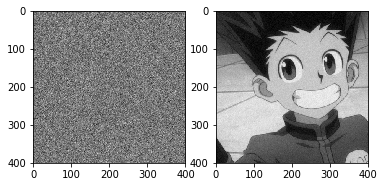

In [0]:
white_noise = np.random.randn(gray.shape[0], gray.shape[1]) * 5
imagem_corrompida = gray + white_noise  
plt.subplot(1,2,1)
plt.imshow(white_noise, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imagem_corrompida, cmap='gray', vmin=0, vmax=255)

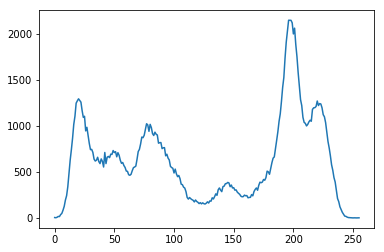

In [0]:
a, b = np.histogram(imagem_corrompida, 256)
plt.plot(a)

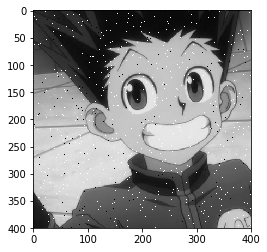

In [0]:
imagem_probabilidade = (white_noise - white_noise.min())/(white_noise.max() - white_noise.min())
salt_and_pepper = gray.copy()

salt_and_pepper[imagem_probabilidade < 0.2] = 0
salt_and_pepper[imagem_probabilidade > 0.7] = 255

plt.imshow(salt_and_pepper, cmap='gray')

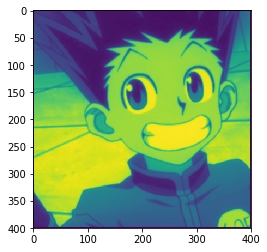

In [0]:
m = 3
k = np.ones( (m, m) ) / m**2
out = np.zeros((altura, largura))
borda = (m-1)//2

for x in range(borda, altura-borda):
  for y in range(borda, largura-borda):

    for s in range(-borda, borda):
      for t in range(-borda, borda):
        
        out[x,y] += gray[x+s,y+t] * k[s+borda,t+borda]
        
plt.imshow(out)      

